<h2>Simple Neural Network with One Hidden Layer</h2>


In [1]:
# Import the necessary libraries 

import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

Function below is used for plotting the model


In [2]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

<h2 id="Model">Neural Network Module and Training Function</h2> 


Define the activations and the output of the first linear layer as an attribute. Note that this is not good practice. 


In [3]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

Define the training function:


In [27]:
# Define the training function

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y.reshape(-1, 1), X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
        if epoch % 300 == 0:    
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

<h2 id="Makeup_Data">Make Some Data</h2>


In [28]:
# Make some data

X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [29]:
Y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

<h2 id="Train">Define the Neural Network, Criterion Function, Optimizer and Train the Model</h2>


Create the Cross-Entropy loss function: 


In [30]:
# The loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

Define the Neural Network, Optimizer, and Train the Model:


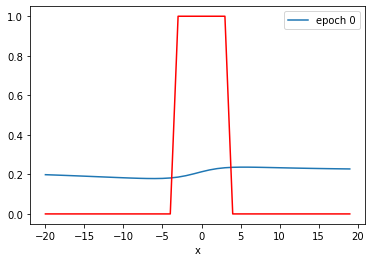

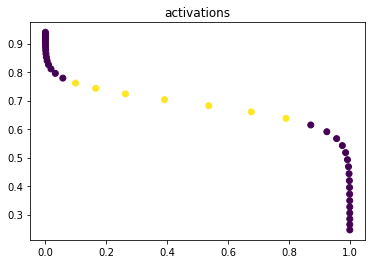

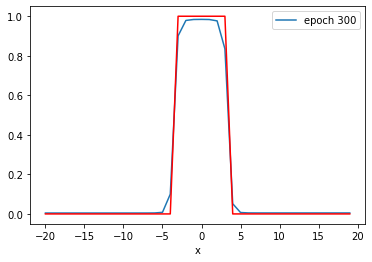

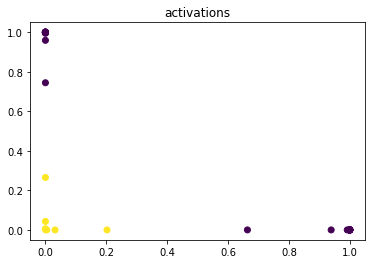

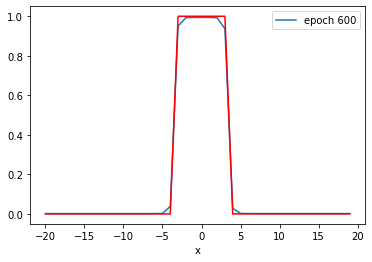

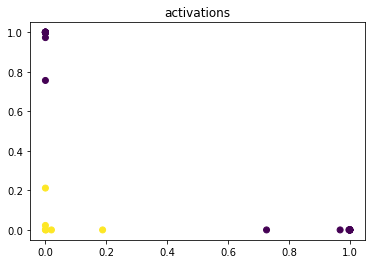

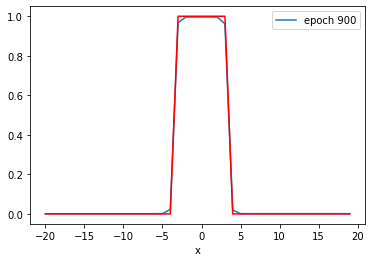

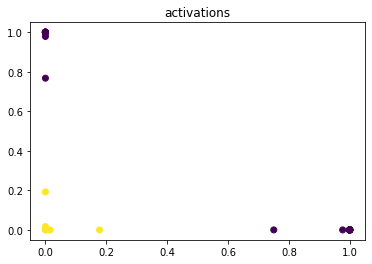

Text(0.5, 1.0, 'cross entropy loss')

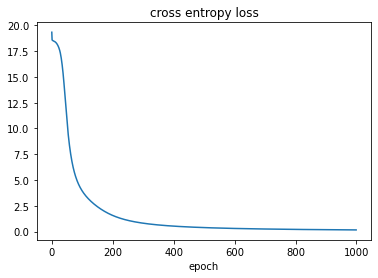

In [31]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

By examining the output of the  activation, we see by the 600th epoch that the data has been mapped to a linearly separable space.


we can make a prediction for a arbitrary one tensors 


In [32]:
x=torch.tensor([0.0])
yhat=model(x)
yhat

tensor([0.9968], grad_fn=<SigmoidBackward0>)

we can make a prediction for some arbitrary one tensors  


In [33]:
X_=torch.tensor([[0.0],[2.0],[3.0]])
Yhat=model(X_)
Yhat

tensor([[0.9968],
        [0.9962],
        [0.9667]], grad_fn=<SigmoidBackward0>)

we  can threshold the predication


In [34]:
Yhat=Yhat>0.5
Yhat

tensor([[True],
        [True],
        [True]])

## Using the MSE cost: 


In [35]:
criterion_rms = nn.MSELoss()

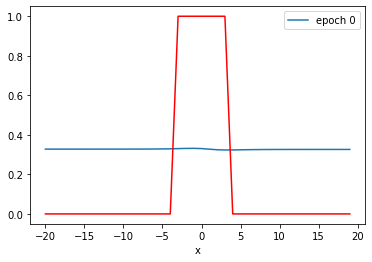

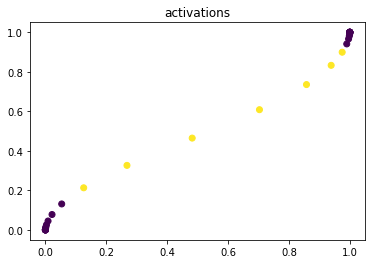

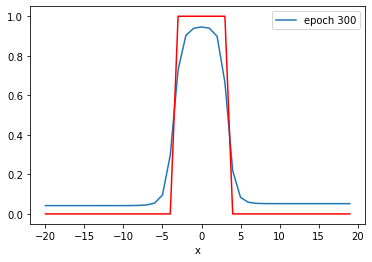

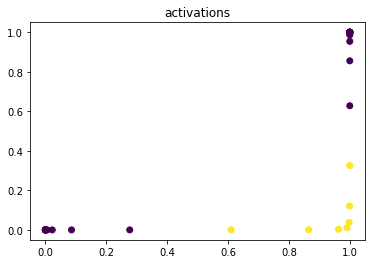

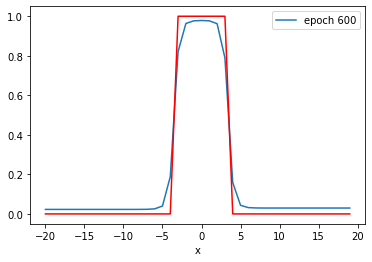

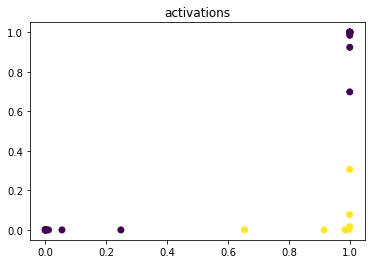

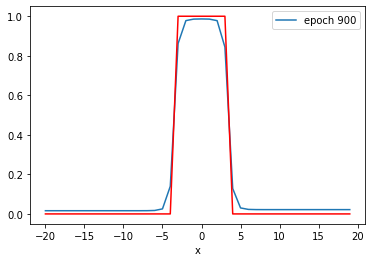

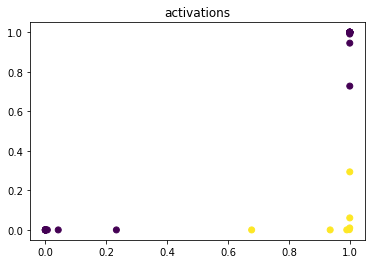

Text(0.5, 1.0, 'cross entropy loss')

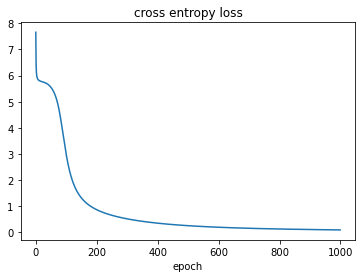

In [36]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_rms, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('MSE Loss')

we can make a prediction for a arbitrary one tensors 


In [37]:
x=torch.tensor([0.0])
yhat=model(x)
yhat

tensor([0.9877], grad_fn=<SigmoidBackward0>)

we can make a prediction for some arbitrary one tensors  


In [38]:
X_=torch.tensor([[0.0],[2.0],[3.0]])
Yhat=model(X_)
Yhat

tensor([[0.9877],
        [0.9803],
        [0.8556]], grad_fn=<SigmoidBackward0>)

we  can threshold the predication


In [39]:
Yhat=Yhat>0.5
Yhat

tensor([[True],
        [True],
        [True]])